# 第5章 正态线性模型

## 5-1 一元回归模型

即单个连续解释性变量的模型

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

%precision 3
%matplotlib inline

In [2]:
beer = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/5-1-1-beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


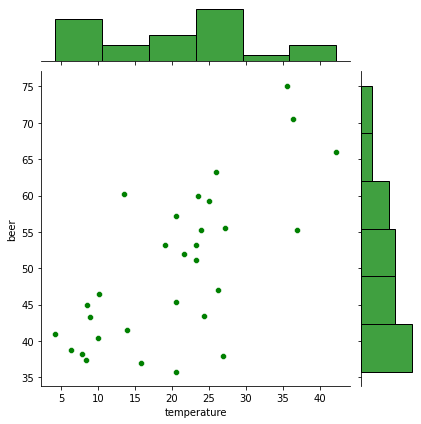

In [3]:
sns.jointplot(x='temperature',y='beer',data=beer,color='g')

### 5-1-4 使用statsmodels实现模型化

In [4]:
#OLS最小二乘法
lm_model = smf.ols(formula='beer~temperature',data=beer).fit()

### 5-1-5 打印估计结果并检验系数

In [5]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.11e-05
Time:                        17:35:31   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> 参数说明
Dep.Variable：响应变量的名称，Dep 为 Depended 的缩写。
Model/Method：表示这里使用了普通最小二乘法（OLS）。
Date/Time：对模型进行估计的日期和时间。
No.Observations：样本容量。
Df Residuals：样本容量减去参与估计的参数个数。
Df Model：用到的解释变量的个数（不是参数个数）。
Covariance Type：协方差类型，默认为 nonrobust。
R-Squared/Adj.R-Squared：决定系数与修正决定系数（见后文）。
F-statistic/Prob(F-statistic)：方差分析的结果。
Log-Likelihood：最大对数似然。
AIC：赤池信息量准则。
BIC：贝叶斯信息量准则，属于信息量准则的一种。

### 5-1-7 使用AIC进行模型选择

AIC = -2 × ( 最大对数似然 - 参与估计的参数个数 )

In [6]:
lm_model.aic

208.9090293557544

In [7]:
#无解释变量时的模型aic
smf.ols('beer~1',data=beer).fit().aic

227.94194972563105

### 5-1-9 用seaborn绘制回归直线

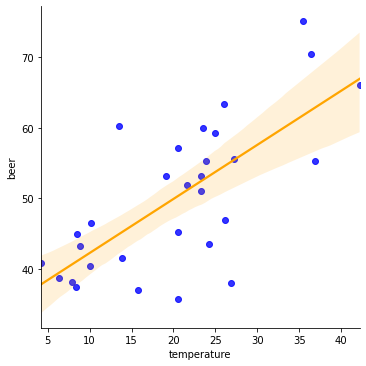

In [8]:
sns.lmplot(x='temperature',y='beer',data=beer,
           scatter_kws={'color':'blue'},
           line_kws={'color':'orange'}
          )

### 5-1-10 使用模型进行预测

In [9]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [11]:
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


In [12]:
#预测气温为0时的销售额
#lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [15]:
pd.DataFrame({'temperature':[0]})

,temperature
0,0


In [16]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [17]:
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [18]:
lm_model.params[0] + lm_model.params[1] * 20

49.918767010950496

### 5-1-11 获取残差

In [19]:
resid = lm_model.resid

In [20]:
resid

0     -5.001481
1      5.554095
2     -1.864491
3    -17.200217
4     -9.703971
5      3.074989
6     15.256512
7      8.788667
8     -1.344678
9      3.783650
10    -7.664418
11     3.970118
12    -9.710106
13     0.755322
14    -3.639807
15     7.302236
16    -3.749659
17    13.317105
18     0.170154
19     6.898519
20     4.082423
21   -14.501481
22     0.756549
23    -2.457093
24    -0.911259
25     2.396065
26    -7.554493
27     1.877479
28     8.028221
29    -0.708952
dtype: float64

### 5-1-12 决定系数
R-Squared叫作决定系数,用来评估模型与已知数据的契合度。

### 5-1-13 实现决定系数

In [22]:
np.around(lm_model.rsquared,3)

0.504

### 5-1-12 修正决定系数
修正决定系数考虑了解释变量过多的惩罚指标，通过自由度修正了决定系数。

In [28]:
def around3(x):
    final = np.around(x,3)
    return final

In [29]:
around3(lm_model.rsquared_adj)

0.486

### 5-1-16 残差的直方图和散点图

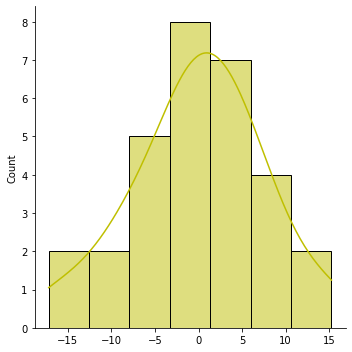

In [36]:
sns.displot(resid,color='y',kde=True)

/Users/meininghang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


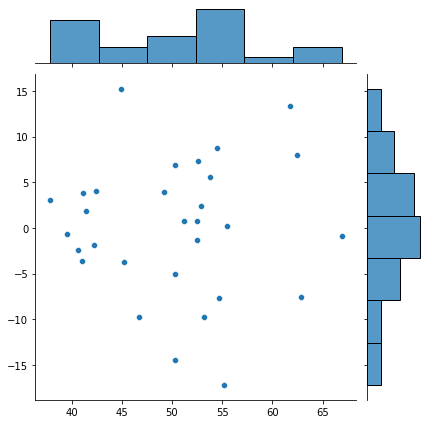

In [39]:
sns.jointplot(lm_model.fittedvalues,resid,)

### 5-1-18 分位图

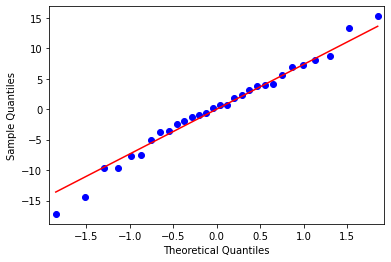

In [41]:
fig = sm.qqplot(resid,line='s')

## 5-2 方差分析

In [42]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [43]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set()
%matplotlib inline 
%precision 3
def around3(x):
    final = np.around(x,3)
    return final

### 5-2-9 生成数据并可视化

In [44]:
#测试样本
beer = [6,8,2,4,10,12]
weather = [
    'cloudy','cloudy',
    'rainy','rainy',
    'sunny','sunny'
]
weather_beer = pd.DataFrame({
    'beer':beer,
    'weather':weather
})
weather_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


<AxesSubplot:xlabel='weather', ylabel='beer'>

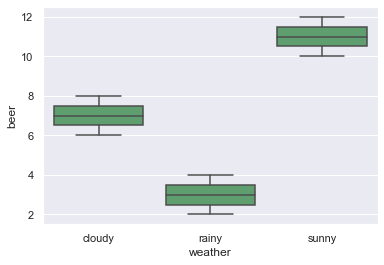

In [45]:
sns.boxplot(x='weather',y='beer',data=weather_beer,color='g')

In [46]:
weather_beer.groupby('weather').mean()

,beer
weather,
cloudy,7
rainy,3
sunny,11


### 5-2-14 statsmodels中的方差分析

In [49]:
anova_model = smf.ols('beer~weather',data=weather_beer).fit()

In [50]:
sm.stats.anova_lm(anova_model,typ=2)

,sum_sq,df,F,PR(>F)
weather,64.0,2.0,16.0,0.025095
Residual,6.0,3.0,NaN,NaN


sm.stats.anova_lm 函数的输出结果就是方差分析表。

In [51]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

### 5-2-18 使用模型分离效应和误差

In [52]:
anova_model.fittedvalues

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [53]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

### 5-2-19 回归模型中的方差分析

In [54]:
beer = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/5-1-1-beer.csv')

In [55]:
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


In [56]:
#估计模型
lm_model = smf.ols('beer~temperature',data=beer).fit()

In [57]:
sm.stats.anova_lm(lm_model,typ=2)

,sum_sq,df,F,PR(>F)
temperature,1651.532489,1.0,28.446984,0.000011
Residual,1625.582178,28.0,NaN,NaN


In [59]:
lm_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.486   
Dependent Variable: beer             AIC:                208.9090
Date:               2021-05-29 18:39 BIC:                211.7114
No. Observations:   30               Log-Likelihood:     -102.45 
Df Model:           1                F-statistic:        28.45   
Df Residuals:       28               Prob (F-statistic): 1.11e-05
R-squared:          0.504            Scale:              58.057  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept     34.6102    3.2349  10.6992  0.0000  27.9839  41.2365
temperature    0.7654    0.1435   5.3336  0.0000   0.4715   1.0594
-----------------------------------------------------------------
Omnibus:               0.587        Durbin-Watson:          1.960
Prob(Omnibus):         0.746        Jarque-Bera (JB):       0.290
Skew:                  -0.240       Prob(JB):               0.865
Kurtosis:              2.951        Condition No.:          52   
=================================================================

"""

## 5-3 含有多个解释变量的模型

In [60]:
sales = pd.read_csv('/Users/meininghang/Downloads/【源码】用Python动手学统计学/5-3-1-lm-model.csv')
sales.head()

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy


### 5-3-2 数据可视化

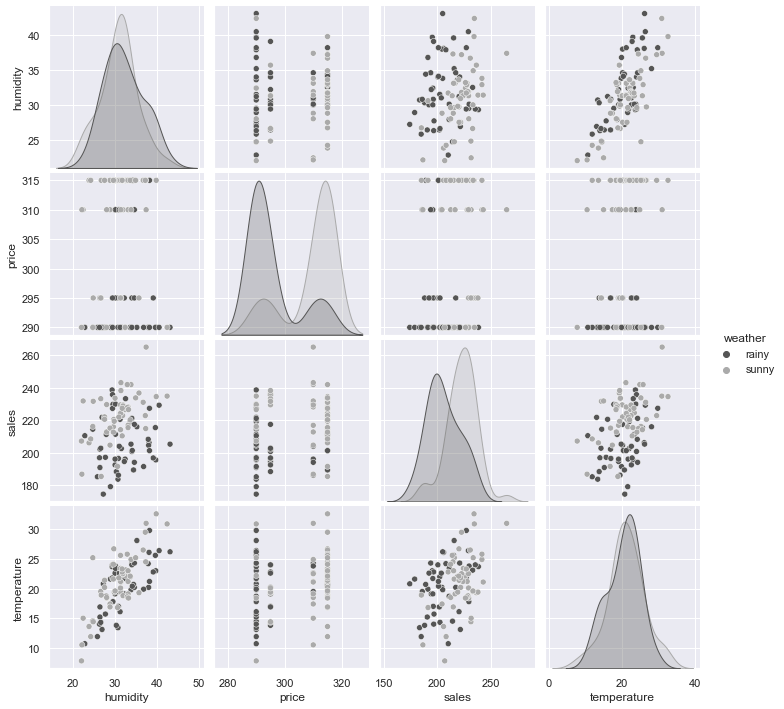

In [62]:
sns.pairplot(data=sales,hue='weather',palette='gray')

### 5-3-4 分析解释变量之间的关系

In [63]:
sales.groupby('weather').mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


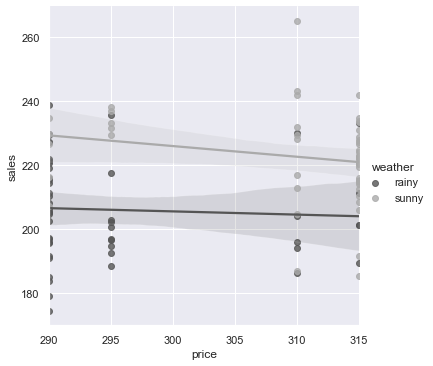

In [65]:
#天气相同下，价格对销售额的影响
sns.lmplot(x='price',y='sales',
           data=sales,
           hue='weather',
           palette='gray')

### 5-3-5 多解释变量的模型

In [66]:
lm_sales = smf.ols(
    'sales ~ weather+humidity+temperature+price',
    data = sales
).fit()

In [67]:
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [68]:
#改变解释变量的顺序
lm_sales_2 = smf.ols(
    "sales ~ weather + temperature + humidity + price",
    data=sales).fit()

### 5-3-7 回归系数的t检验

In [69]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [70]:
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


### 5-3-11 实现Type II ANOVA